In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cvx

%matplotlib inline

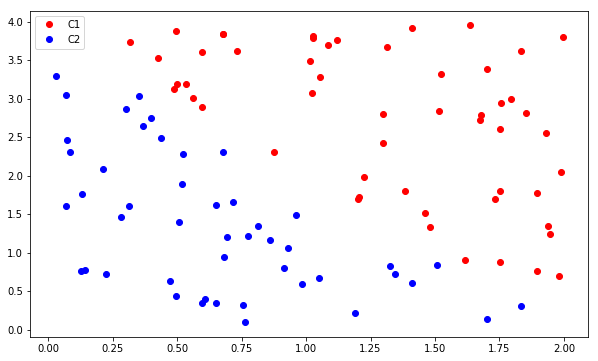

In [2]:
m = 100
w = np.array([-4, 2, 1]).reshape(-1, 1) # 가상의 g(x)=0을 뜻함
# X generation with 1, x1, x2 -> m x 3 matrix
X = np.hstack([np.ones([m,1]), 2*np.random.rand(m,1), 4*np.random.rand(m,1)])

w = np.asmatrix(w)
X = np.asmatrix(X)

y = (np.exp(X*w)/(1+np.exp(X*w))) > 0.5   # sigmoid function이 0.5보다 크면 C1

C1 = np.where(y == True)[0]
C2 = np.where(y == False)[0]

# labeling
y = np.empty([m,1])
y[C1] = 1    
y[C2] = 0
y = np.asmatrix(y)

plt.figure(figsize=(10,6))
plt.plot(X[C1,1],X[C1,2], 'ro', label='C1')   # C1에 해당하는 행들 
plt.plot(X[C2,1],X[C2,2], 'bo', label='C2')

plt.legend()
plt.show()

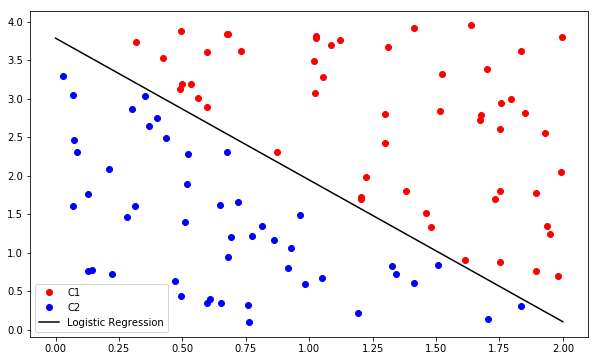

In [3]:
w = cvx.Variable(3, 1)  # wo, w1, w2

obj = cvx.Maximize(y.T*X*w - cvx.sum_entries(cvx.logistic(X*w)))
prob = cvx.Problem(obj).solve()

w = w.value

xp = np.linspace(0, 2, 100).reshape(-1, 1)
yp = - w[1,0]/w[2,0]*xp - w[0,0]/w[2,0]

plt.figure(figsize=(10,6))
plt.plot(X[C1,1],X[C1,2], 'ro', label='C1')   
plt.plot(X[C2,1],X[C2,2], 'bo', label='C2')
plt.plot(xp, yp, 'k', label='Logistic Regression')
plt.legend()
plt.show()

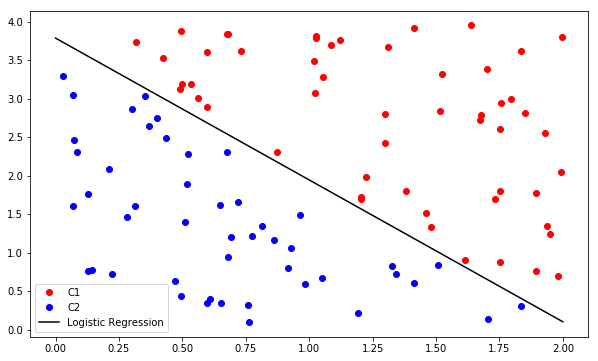

In [4]:
# Compact form

# labeling
y = np.empty([m,1])
y[C1] = 1    
y[C2] = -1 ####
y = np.asmatrix(y)

w = cvx.Variable(3, 1)

obj = cvx.Minimize(cvx.sum_entries(cvx.logistic(-cvx.mul_elemwise(y, X*w))))
prob = cvx.Problem(obj).solve()

w = w.value

xp = np.linspace(0, 2, 100).reshape(-1, 1)
yp = - w[1,0]/w[2,0]*xp - w[0,0]/w[2,0]

plt.figure(figsize=(10,6))
plt.plot(X[C1,1],X[C1,2], 'ro', label='C1')   
plt.plot(X[C2,1],X[C2,2], 'bo', label='C2')
plt.plot(xp, yp, 'k', label='Logistic Regression')
plt.legend()
plt.show()

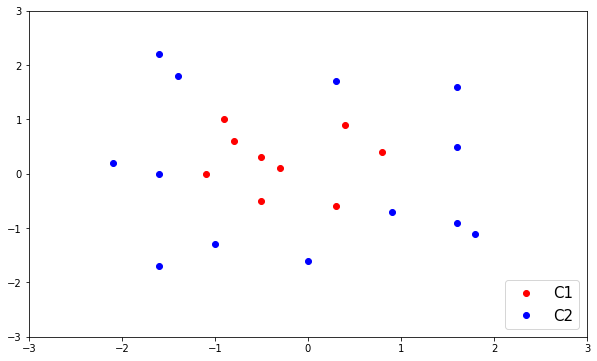

In [5]:
X1 = np.array([[-1.1,  0], [-0.3,  0.1], [-0.9,  1],[0.8,  0.4],[0.4,  0.9],[0.3,-0.6],
               [-0.5, 0.3],[-0.8,  0.6],[-0.5, -0.5]])
     
X2 = np.array([[-1,  -1.3], [-1.6 , 2.2],  [0.9, -0.7],[1.6,  0.5],[1.8, -1.1],[1.6,  1.6],
               [-1.6, -1.7],[-1.4,  1.8],[1.6, -0.9],[0, -1.6],[0.3, 1.7],[-1.6 , 0],[-2.1,0.2]])

X1 = np.asmatrix(X1)
X2 = np.asmatrix(X2)

plt.figure(figsize=(10, 6))
plt.plot(X1[:,0], X1[:,1], 'ro', label='C1')
plt.plot(X2[:,0], X2[:,1], 'bo', label='C2')
plt.axis([-3,3,-3,3])
plt.legend(loc = 4, fontsize = 15)
plt.show()

In [6]:
N = X1.shape[0]  # C1 point 갯수
M = X2.shape[0]

X = np.vstack([X1, X2])
y = np.vstack([np.ones([N,1]), -np.ones([M,1])])  # 1~N만큼 1, N+1~N+M까지 -1

X = np.asmatrix(X)
y = np.asmatrix(y)

# Explicit kernal

m = N + M
Z = np.hstack([np.ones([m,1]), np.sqrt(2)*X[:,0], np.sqrt(2)*X[:,1], np.square(X[:,0]), 
               np.sqrt(2)*np.multiply(X[:,0],X[:,1]), np.square(X[:,1])])

w = cvx.Variable(6, 1)

obj = cvx.Minimize(cvx.sum_entries(cvx.logistic(-cvx.mul_elemwise(y, Z*w))))
prob = cvx.Problem(obj).solve()

w = w.value

In [7]:
[X1gr, X2gr] = np.meshgrid(np.arange(-3,3,0.1), np.arange(-3,3,0.1))

test_X = np.hstack([X1gr.reshape(-1,1), X2gr.reshape(-1,1)])
test_X = np.asmatrix(test_X)

m = test_X.shape[0]
test_Z = np.hstack([np.ones([m,1]), np.sqrt(2)*test_X[:,0], np.sqrt(2)*test_X[:,1], np.square(test_X[:,0]), 
               np.sqrt(2)*np.multiply(test_X[:,0],test_X[:,1]), np.square(test_X[:,1])])

q = (np.exp(test_Z*w)/(1+np.exp(test_Z*w)))  # sigmoid function
print(np.shape(q))

(3600, 1)


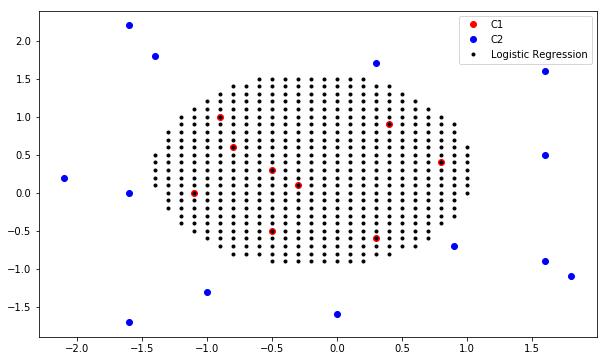

In [8]:
B = []  # 빈 리스트

for i in range(m):
    if q[i,0] > 0.5 :   # sigmoid function이 0.5보다 크면
        B.append(test_X[i,:]) # 그에 해당하는 test_X[i,:](Matrix)를 리스트 B에 추가한다 
        
B1 = np.vstack(B)   # 옆으로 추가된 Xi를 수직으로 쌓는다.

plt.figure(figsize=(10, 6))
plt.plot(X1[:,0], X1[:,1], 'ro', label='C1')
plt.plot(X2[:,0], X2[:,1], 'bo', label='C2')
plt.plot(B1[:,0], B1[:,1], 'k.', label='Logistic Regression')
plt.axis('tight')
plt.legend(loc = 1)
plt.show()